In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# DEFINE DIR AND FILE NAME
LOG_DIR = os.getcwd()+'/mnist_log'
path_for_mnist_checkpoint = os.path.join(LOG_DIR, "model.ckpt")
path_for_mnist_metadata =  os.path.join(LOG_DIR,'metadata.tsv')
path_for_mnist_sprites =  os.path.join(LOG_DIR,'mnistdigits.png')
tensor_name = 'mnist_embeddings'

# CONFIGURE PROJECTOR TO POINT TO THE RIGHT PATHS
summary_writer = tf.summary.FileWriter(LOG_DIR)
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = tensor_name
embedding.metadata_path = path_for_mnist_metadata 
embedding.sprite.image_path = path_for_mnist_sprites
embedding.sprite.single_image_dim.extend([28,28])
projector.visualize_embeddings(summary_writer, config)

In [3]:
# LOAD DATA
Samples_to_visualize = 500
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
batch_xs, batch_ys = mnist.train.next_batch(Samples_to_visualize)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# PREPARE DATA IN CKPT FORMAT
embedding_var = tf.Variable(batch_xs, name=tensor_name)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.save(sess, path_for_mnist_checkpoint, 1)

'C:\\Users\\teejs\\Documents\\Dev\\Visualization/mnist_log\\model.ckpt-1'

In [7]:
# PREPARE METADATA IN TSV FORMAT
with open(path_for_mnist_metadata,'w') as f:
    f.write("Index\tLabel\n")
    for index,label in enumerate(batch_ys):
        f.write("%d\t%d\n" % (index,label))

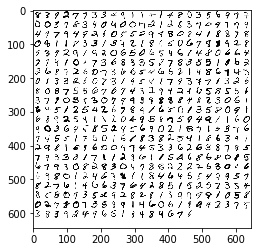

In [9]:
# PREPARE IMAGE SPRITE IN PNG FORMAT
to_visualise = batch_xs
# Reshapes mnist digit embedding shape (batch,28*28) to image shape (batch,28,28)
to_visualise = np.reshape(to_visualise,(-1,28,28))
# invert black white
to_visualise = 1-to_visualise

to_visualise = np.array(to_visualise)
img_h = to_visualise.shape[1]
img_w = to_visualise.shape[2]
n_plots = int(np.ceil(np.sqrt(to_visualise.shape[0])))
# create big sprite template
sprite_image = np.ones((img_h * n_plots ,img_w * n_plots ))
# fill the sprite templates with the handwritten digits
for i in range(n_plots):
    for j in range(n_plots):
        this_filter = i * n_plots + j
        if this_filter < to_visualise.shape[0]:
            this_img = to_visualise[this_filter]
            sprite_image[i * img_h:(i + 1) * img_h,
              j * img_w:(j + 1) * img_w] = this_img
# save the sprite image
plt.imsave(path_for_mnist_sprites,sprite_image,cmap='gray')
plt.imshow(sprite_image,cmap='gray')